In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree 

In [6]:
kyp = pd.read_csv("Kyphosis.csv")
kyp

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [8]:
le = LabelEncoder()

In [11]:
X = kyp.drop("Kyphosis", axis = 1)
y = le.fit_transform(kyp["Kyphosis"])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 24, test_size = 0.5)

In [21]:
# create instance;

dct = DecisionTreeClassifier(random_state = 24, min_samples_leaf = 14)
dct.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=14, random_state=24)

0.7804878048780488


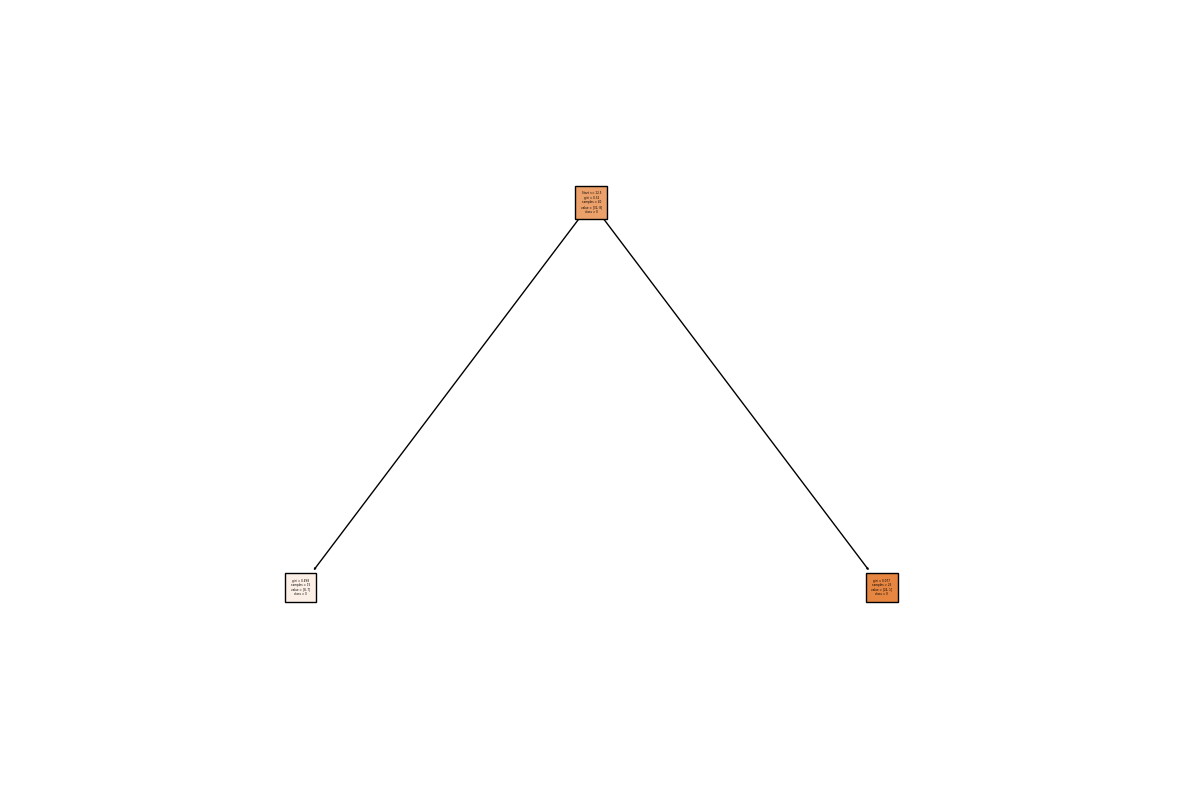

In [25]:
# plot the tree;

plt.figure(figsize = (15,10))
plot_tree(dct, feature_names =list(X.columns), class_names = ["0", "1"],
          filled = True, fontsize = 2)




y_pred = dct.predict(X_test)
print(accuracy_score(y_test, y_pred))


In [29]:
params = {'min_samples_split':[2,4,6,10,20],
          'min_samples_leaf':[1,5,10,15],
          'max_depth':[None, 4, 3, 2]}
    
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state= 24)

dct = DecisionTreeClassifier()